## This is the script reading the csv files contain roi mean values for all frame, then walk through each sequence(folder), sort the frames in sequence, find the corresponding roi fro csv, then plot. 

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import glob
import json 
import matplotlib.pyplot as plt

In [2]:
roi_mean_values = pd.read_csv('../outputs/smirk_roi_mean_values.csv')

In [3]:
smirk_child = '../datasets/smirk/child/'

Z8CrcBAx3TYsVgtucXJUV


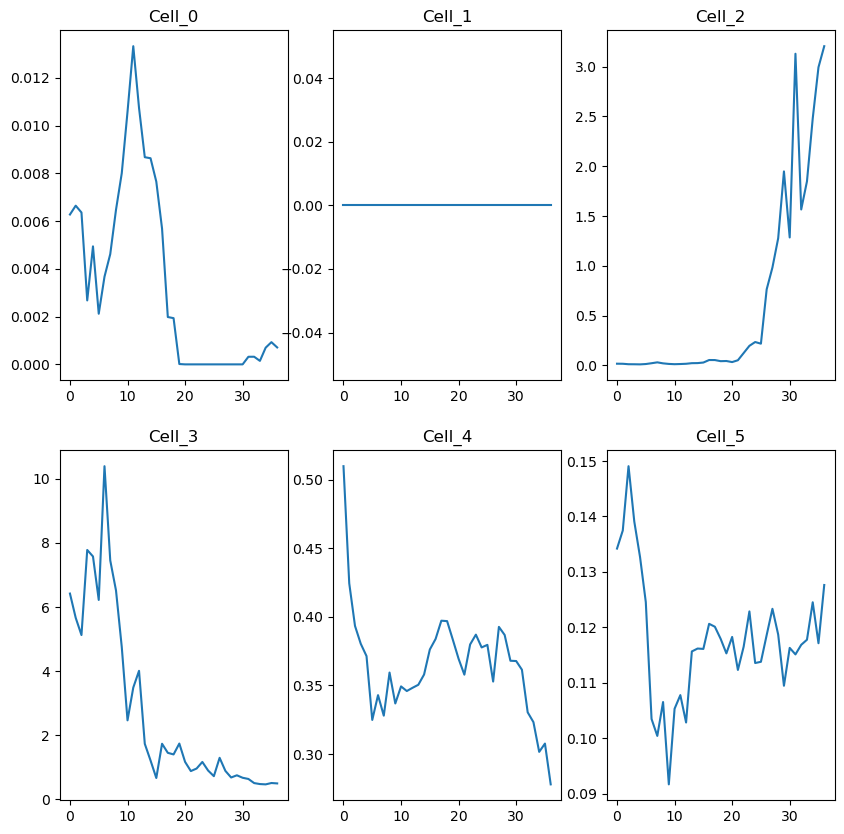

In [50]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(10,10)) # here use 2 and 3 becuase there are 6 roi regions in total.
axs = np.atleast_2d(axs).reshape(-1)
cell_values_seq = []
for seq in os.listdir(smirk_child):
    print(seq)
    if os.path.isdir(os.path.join(smirk_child, seq)): # reason for this is there is a labels.csv file in /child, need to skip it.
        for anno_frame in sorted(glob.glob(os.path.join(smirk_child, seq, '*.labels.png'))):
            rgb_frame = anno_frame.replace('.labels.png', '.png').replace('../datasets/smirk/child', 'child')
            cell_values = roi_mean_values.set_index('frame').loc[rgb_frame]
            cell_values_seq.append(list(cell_values))
    
        for i in range(6): # 6 roi regions in totoal. Need to change when you change config
            ax = axs[i]
            ax.plot(np.array(cell_values_seq).T[i])
            ax.set_title(f"Cell_{i}")
        # print(np.array(cell_values_seq).T.shape)
        # print(list(cell_values_seq))
            
        break
plt.show()

In [51]:
if not os.path.exists('../outputs/smirk_roi_plot'):
    os.makedirs('../outputs/smirk_roi_plot')

Processing seq Y4kC5HWcultxGWAhuKdZw...

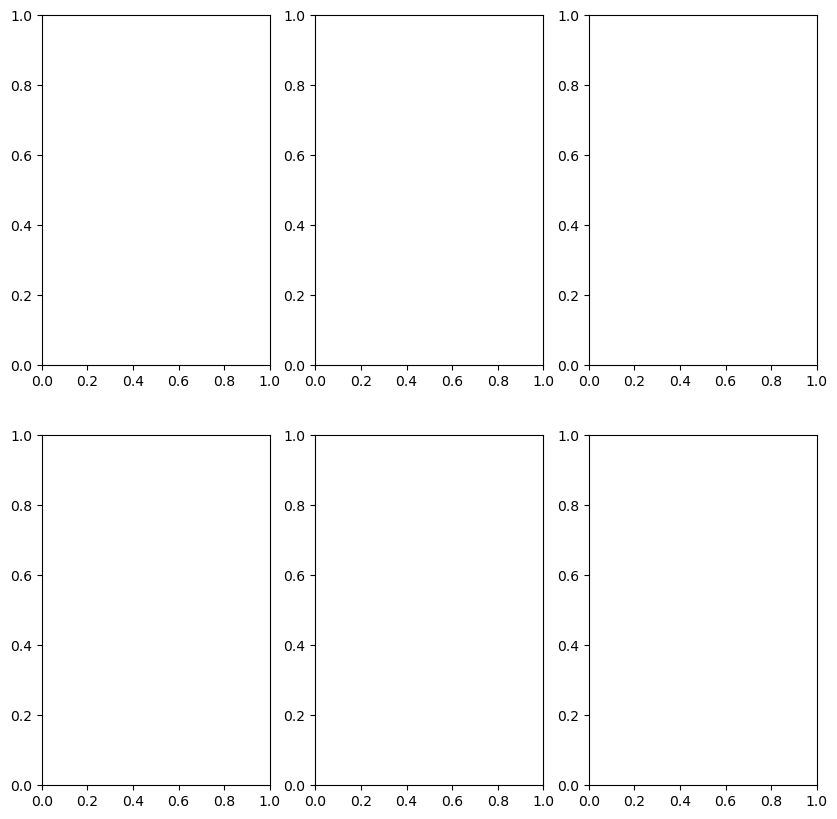

In [52]:
for seq in os.listdir(smirk_child):
    fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(10,10))
    axs = np.atleast_2d(axs).reshape(-1)
    cell_values_seq = []
    if os.path.isdir(os.path.join(smirk_child, seq)): # reason for this is there is a labels.csv file in /child, need to skip it.
        for anno_frame in sorted(glob.glob(os.path.join(smirk_child, seq, '*.labels.png'))):
            rgb_frame = anno_frame.replace('.labels.png', '.png').replace('../datasets/smirk/child', 'child')
            cell_values = roi_mean_values.set_index('frame').loc[rgb_frame]
            cell_values_seq.append(list(cell_values))
    
        seq_name = rgb_frame.replace('datasets', 'outputs').split('/')[1]
        print(f'Processing seq {seq_name}...', end='\r', flush=True)
        
        for i in range(6):
            ax = axs[i]
            ax.plot(np.array(cell_values_seq).T[i])
            ax.set_title(f"Cell_{i}")
    
        plot_pdf_path = os.path.join('../outputs/smirk_roi_plot/', f'{seq_name}.pdf')
        plt.savefig(plot_pdf_path, format='pdf')
        plt.close()